## Importing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("googleplaystore.csv")

## Data cleaning

#### Null values

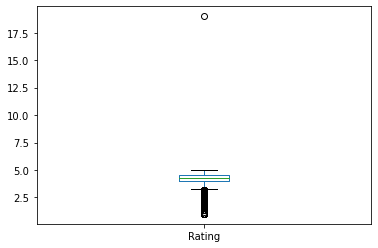

In [3]:
## Understand which columns have nulls
df.isna().sum().sort_values(ascending=False)  
df["Rating"].plot(kind="box") 

## Replace all invalid and null values with the mean rating
df.loc[df["Rating"]>5,"Rating"] = np.NaN
mean_rating = df["Rating"].mean()
df.loc[df["Rating"].isna(), "Rating"] = mean_rating

# Drop all other NAs
df.dropna(inplace=True)

#### Data types

In [4]:
df["Price"] = pd.to_numeric(df["Price"].str.replace("$",""))
df["Reviews"] = pd.to_numeric(df["Reviews"]) 
df["Installs"] = pd.to_numeric(df["Installs"].str.replace("+","").str.replace(",",""))

#### Duplicates

In [5]:
df.sort_values(by="Reviews", ascending=False) # Sort reviews in descending order
df.drop_duplicates("App", inplace=True) # Remove all apps duplicates except the first occurence (row with greatest reviews)

#### String cleaning

In [6]:
## Investigate why all the Size's cannot be converted to the numeric data type
df["Size test"] = pd.to_numeric(df["Size"], errors="coerce") 
df.loc[df["Size test"].isna()] # problems are the "M", "Varies with device", and "k"


## Clean by removing characters and converting to bytes
df.loc[df["Size"].str.contains("M"), "Size"] = (
    pd.to_numeric(df.loc[df["Size"].str.contains("M"), "Size"].str.replace("M", ""))
    * (1024 * 1024)
).astype(str)

df.loc[df["Size"].str.contains("k"), "Size"] = (
    pd.to_numeric(df.loc[df["Size"].str.contains("k"), "Size"].str.replace("k", ""))
    * (1024)
).astype(str)

df.loc[df["Size"].str.contains("Varies with device"), "Size"] = df.loc[
    df["Size"].str.contains("Varies with device"), "Size"
].str.replace("Varies with device", "0")


# Convert the column to numeric data type
df["Size"] = pd.to_numeric(df["Size"])

In [7]:
df["Category"] = df["Category"].str.replace("_"," ").str.capitalize()

#### Final clean-up 

In [8]:
df.drop(["Last Updated","Current Ver","Android Ver", "Size test"], axis=1, inplace=True)
df.rename(columns={"Size":"Size (bytes)"}, inplace=True)

#### Cleaned data

In [9]:
df.head()

,App,Category,Rating,Reviews,Size (bytes),Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,Art and design,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,Art and design,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity


## Analysis 

#### Key Q: Which categories have the greatest installs?

In [16]:
df.groupby("Category").apply(lambda cat: cat["Installs"].mean()).sort_values(ascending=False).head()

Category
Communication    3.504215e+07
Video players    2.409143e+07
Social           2.296179e+07
Entertainment    2.072216e+07
Photography      1.654501e+07
dtype: float64

#### Key Q: Which categories have the greatest ratings?

In [13]:
rating_by_cat = df.groupby("Category").apply(lambda cat: cat["Rating"].mean()).sort_values(ascending=False).head()

Category
Art and design         4.367861
Events                 4.363178
Education              4.362956
Books and reference    4.308920
Personalization        4.302292
dtype: float64